In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.12.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ComputerVision/Churn_Modelling.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
dataset = pd.read_csv(path)
dataset.tail(5)  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
print(y)

[1 0 1 ... 1 1 0]


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, Y_val_and_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val= sc.transform(X_val)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


In [14]:
model = Sequential([
    Dense(7, activation='relu', input_shape=(12,)),   # ( number of features +1 ) / 2
    #Dense(7, activation='relu'),
   # Dense(7, activation='relu'),
    Dense(1, activation='sigmoid'),
])

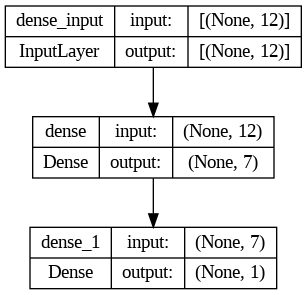

In [15]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, Y_val.shape, Y_test.shape)

(7000, 12) (1500, 12) (1500, 12) (7000,) (1500,) (1500,)


In [18]:
myModel = model.fit(X_train, y_train, batch_size = 16, epochs = 50,validation_data=(X_val, Y_val))

Epoch 1/50
7/7 [==============================] - 4s 78ms/step - loss: 0.6087 - accuracy: 0.7057 - val_loss: 0.5971 - val_accuracy: 0.7227
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5969 - accuracy: 0.7201 - val_loss: 0.5841 - val_accuracy: 0.7313
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 0.5861 - accuracy: 0.7313 - val_loss: 0.5721 - val_accuracy: 0.7420
Epoch 4/50
7/7 [==============================] - 0s 28ms/step - loss: 0.5762 - accuracy: 0.7423 - val_loss: 0.5612 - val_accuracy: 0.7533
Epoch 5/50
7/7 [==============================] - 0s 14ms/step - loss: 0.5671 - accuracy: 0.7507 - val_loss: 0.5513 - val_accuracy: 0.7640
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.5588 - accuracy: 0.7593 - val_loss: 0.5423 - val_accuracy: 0.7740
Epoch 7/50
7/7 [==============================] - 0s 23ms/step - loss: 0.5515 - accuracy: 0.7673 - val_loss: 0.5340 - val_accuracy: 0.7793
Epoch 8/50
7/7 [===========



Use  ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say no to that customer ?

In [19]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 97ms/step
[[False]]


In [20]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

47/47 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1201    0]
 [ 298    1]]


0.8013333333333333

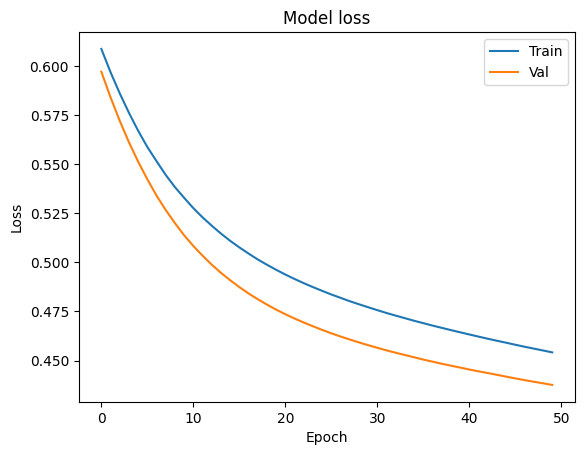

In [22]:
import matplotlib.pyplot as plt
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

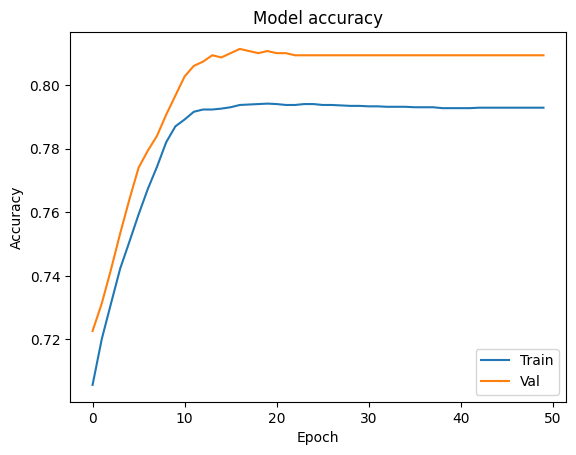

In [23]:
plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()